<a href="https://colab.research.google.com/github/mfaysoares/Alura_Cash/blob/main/Alura_Cash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge Data Science: Alura Cash**

> Olá, tudo bem? ✌ Muito prazer em ter você aqui! Eu me chamo [Matheus](https://www.linkedin.com/in/matheusfay/), sou um Engenheiro Eletricista apaixonado por dados. Atualmente, estou estudando Data Science através da plataforma da [Alura](https://www.alura.com.br/).

Nesse Notebook estarão presentes os códigos e descrição dos desenvolvimentos realizados na 1º edição do Challenge Data Science, com o projeto ***Alura Cash***.

---

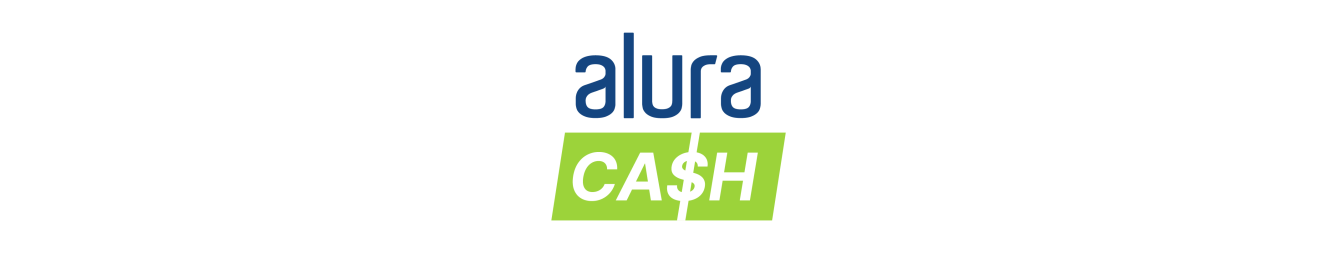

## **1. Desafio:** ✍

> Somos uma equipe de dados que foi contratada para fazer parte do banco digital internacional chamado Alura Cash. No primeiro dia, a diretoria financeira nos convocou para uma reunião para informar que, recorrentemente, estão surgindo pessoas inadimplentes após a liberação de créditos.

> Por conta disso, foi solicitada uma solução para diminuir as perdas financeiras geradas por pessoas mutuárias que não quitam suas dívidas. Nos foi informado também que teríamos o prazo de um mês para encontrar essa solução e apresentá-la à diretoria financeira. Sendo assim, solicitamos um conjunto de dados contendo as informações de clientes, da solicitação de empréstimo, do histórico de crédito, bem como se a pessoa mutuária é inadimplente ou não.

---

## **2. Tratando os Dados:** 🧹

Foram disponibilizados diversas base de dados com informações relativas a clientes que solicitaram crédito. Nesse capítulo, obtidas as informações de nossa fonte, será descrito todo o procedimento de preparação dos dados para posterior análise. 

Essa etapa de preparação é fundamental para início de qualquer projeto. Esse procedimento é conhecido como Data Preparation e pode ser dividido em 4 partes principais: ***Aquisição (1), Exploração (2), Limpeza (3) e Transformação (4)***.



Fonte: STEDMAN, Craig. What is data preparation?: An in-depth guide to data prep. [S. l.], 2022. Disponível em: https://www.techtarget.com/searchbusinessanalytics/definition/data-preparation. Acesso em: 2 set. 2022.












### **2.1 Analisando os Databases:**

Após gerar nossas tabelas pelos arquivos *dump* disponibilizados pela plataforma, utilizei a biblioteca pandas do Python para leitura e exploração inicial de nossos *dataframes*.

In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
dados_mutuarios = pd.read_csv('dados_mutuarios.csv',
                              sep = ';',
                              decimal = ',',
                              encoding='latin-1')
dados_mutuarios.head(3)

,person_id,person_age,person_income,person_home_ownership,person_emp_length
0,tad8vkTn-vp4l,33,48000,Rent,17.0
1,dEILQqp2-lgLx,24,75000,Own,0.0
2,Az11sWWw-SdFA,29,28800,Rent,5.0


In [ ]:
emprestimos = pd.read_csv('emprestimos.csv',
                          sep = ';',
                          decimal = ',',
                          encoding='latin-1')
emprestimos.head(3)

,loan_id,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,NMgFWFWN-2yGG,Homeimprovement,C,20000,13.22,0,0.22
1,08Ts3XSa-KkvE,Venture,C,6000,13.49,0,0.04
2,xo79pAME-elmp,Personal,A,8000,6.17,0,0.13


In [ ]:
historico_bancario = pd.read_csv('historicos_banco.csv',
                                sep = ';',
                                decimal = ',',
                                encoding='latin-1')
historico_bancario.head(3)

,cb_id,cb_person_default_on_file,cb_person_cred_hist_length
0,ZNWGR0Ap-FDt2,N,9
1,wqALDH4x-mnzE,N,7
2,57O09sJw-NBKj,N,6


In [ ]:
id = pd.read_csv('id.csv',
                sep = ';',
                decimal = ',',
                encoding='latin-1')
id.head(3)

,person_id,loan_id,cb_id
0,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7
1,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK
2,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q


Analisando os dados iniciais percebemos que cada uma das tabelas fornece diferentes informações que trazem dados tanto de informações do cliente como transações bancárias. Em primeira vista, as bases parecem não conversarem entre si, mas aos analisarmos o *dataframe* **ID**, percebemos a sua importância em relacionar cada cliente com o respectivo código de cada tabela.

### **2.2 Limpando os Dados:**

Antes de agregarmos os dados em uma base completa, é importante realizar o procedimento de limpeza, evitando assim que possíveis valores incorretos prejudiquem nossa análise.


#### **2.2.1 Dados Mutuários:**

Iniciando pelo dataframe de dados mutuários, através da função describe, percebemos que a coluna ***person_age***, que informa a idade (em anos) da pessoa que solicitou o empréstimo apresenta como valor mínimo 0. Concordamos que esse valor é ERRADO, dessa forma é necessário retirar esse valores de nossa base.

Da mesma forma, para a coluna ***person_income***, que informa o salário anual do solicitante, também tem como valor mínimo 0. Com isso, dado a incoerência desses dados, os clientes com esses valores serão exclusos da análise.

In [ ]:
dados_mutuarios.describe()

,person_age,person_income
count,34489.000000,3.448900e+04
mean,27.472759,6.538133e+04
std,6.854709,6.145298e+04
min,0.000000,0.000000e+00
25%,23.000000,3.800000e+04
50%,26.000000,5.500000e+04
75%,30.000000,7.870000e+04
max,144.000000,6.000000e+06


In [ ]:
dados_mutuarios = dados_mutuarios[(dados_mutuarios['person_age'] > 0) &
                                 (dados_mutuarios['person_income'] > 0)]
dados_mutuarios.reset_index(drop = True, inplace = True)
dados_mutuarios.describe()                             

,person_age,person_income
count,33868.000000,3.386800e+04
mean,27.736182,6.601453e+04
std,6.349116,6.154255e+04
min,20.000000,4.000000e+03
25%,23.000000,3.841500e+04
50%,26.000000,5.500000e+04
75%,30.000000,7.906250e+04
max,144.000000,6.000000e+06


#### **2.2.2 Empréstimos:**

Seguindo a mesma linha de raciocínio do item ***2.2.1***, analisaremos o dataframe **emprestimos.csv**. A descrição inicial já demonstra que a coluna ***loan_amnt***, que representa o valor total de empréstimo solicitado, tem como valor mínimo 0. Visto que em uma base que trata de empréstimos solicitados, não faz sentido para nossa análise considerarmos esse tipo de informação. Logo, a mesma será retirada.

In [ ]:
emprestimos.describe()

,loan_amnt,loan_status
count,34489.000000,34489.000000
mean,9498.521268,0.216011
std,6359.726741,0.411528
min,0.000000,0.000000
25%,5000.000000,0.000000
50%,8000.000000,0.000000
75%,12000.000000,0.000000
max,35000.000000,1.000000


In [ ]:
emprestimos = emprestimos[(emprestimos['loan_amnt'] > 0)]
emprestimos.reset_index(drop = True, inplace = True)
emprestimos.describe()  

,loan_amnt,loan_status
count,34158.000000,34158.000000
mean,9590.564436,0.216201
std,6321.020289,0.411659
min,500.000000,0.000000
25%,5000.000000,0.000000
50%,8000.000000,0.000000
75%,12200.000000,0.000000
max,35000.000000,1.000000


Vale destacar que apesar da coluna ***loan_status*** também apresentar como valor mínimo 0, essa coluna fornece uma outra informação, que é o risco de inadimplência. Dessa forma, para essa coluna FAZ sentido esse valor.

#### **2.2.3 Históricos Bancários:**

No dataframe `historicos_banco.csv`, nos é fornecido o histórico de empréstimo de cada cliente. Analisando pelo mesmo procedimento das demais, verificamos que tal base não aparenta inconsistências de informação.

Apesar da coluna ***cb_person_cred_hist_length*** apresentar dado mínimo de 0, esse dado diz respeito ao tempo (em anos) desde a primeira solicitação de crédito ou aquisição de um cartão de crédito. Logo, um valor mínimo de zero é coerente.

In [ ]:
historico_bancario.describe()

,cb_person_cred_hist_length
count,34489.000000
mean,5.808316
std,4.063731
min,0.000000
25%,3.000000
50%,4.000000
75%,8.000000
max,30.000000


#### **2.2.4 ID:**

Esse dataframe fornece as informações que relacionam todas as bases de dados. As informações em cada uma de suas colunas são:

*   **person_id**: ID da pessoa solicitante
*   **loan_id**: ID da solicitação de empréstico de cada solicitante
*   **cb_id**: ID do histórico de cada solicitante



In [ ]:
id.describe()

,person_id,loan_id,cb_id
count,14952,14952,14952
unique,14952,14952,14952
top,JAz2tRvQ-14cy,pjEu6snv-4t33,FIgNSkrG-wen7
freq,1,1,1


### **2.3 Agregando as Bases:**

Realizado o processo de limpeza de nossos dados, é chego a hora de agregar as informações em um arquivo só e exportá-lo em uma base. Para tal processo, será utilizada a função `merge` partindo do id fornecido.

In [ ]:
base_agg = id.merge(dados_mutuarios, how = 'left', left_on = 'person_id', right_on = 'person_id')
base_agg.dropna(subset = ['person_age'], inplace = True)

In [ ]:
base_agg = base_agg.merge(emprestimos, how = 'left', left_on = 'loan_id', right_on = 'loan_id')
base_agg.dropna(subset = ['loan_intent'], inplace = True)

In [ ]:
base_agg = base_agg.merge(historico_bancario, how = 'left', left_on = 'cb_id', right_on = 'cb_id')
base_agg.dropna(subset = ['cb_person_default_on_file'], inplace = True)

In [ ]:
base_agg.dropna(inplace = True)

In [ ]:
base_agg.head(3)

,person_id,loan_id,cb_id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,Mortgage,5.0,Debtconsolidation,B,9000.0,0.0,1.0,0.31,N,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,Rent,1.0,Education,B,2500.0,9.62,1.0,0.13,N,6
3,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,Rent,4.0,Venture,G,1600.0,19.16,0.0,0.04,Y,6


### **2.4 Melhorando a Base:**

Para finalizar, vamos tornar as informações de nossa base final mais claras para a análise. Conforme verificamos anteriormente, muitas das colunas estão em inglês. Visto que temos nosso dicionário com a explicação de cada uma delas, vamos renomear as colunas para deixar mais clara as futuras análises.

In [ ]:
base_agg.rename(columns={"person_age": "idade", 
                         "person_income": "salario_anual",
                         "person_home_ownership":"situacao_moradia",
                         "person_emp_length":"anos_trabalhados",
                         "loan_intent":"motivo_emprestimo",
                         "loan_grade":"pontuacao_emprestimo",
                         "loan_amnt":"valor_emprestimo",
                         "loan_int_rate":"taxa_juros",
                         "loan_status":"inadimplencia",
                         "loan_percent_income":"comprometimento_renda",
                         "cb_person_default_on_file":"historico_inadimplencia",
                         "cb_person_cred_hist_length":"tempo_credito"},
                inplace = True)
base_agg.head(3)

,person_id,loan_id,cb_id,idade,salario_anual,situacao_moradia,anos_trabalhados,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,comprometimento_renda,historico_inadimplencia,tempo_credito
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,Mortgage,5.0,Debtconsolidation,B,9000.0,0.0,1.0,0.31,N,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,Rent,1.0,Education,B,2500.0,9.62,1.0,0.13,N,6
3,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,Rent,4.0,Venture,G,1600.0,19.16,0.0,0.04,Y,6


Para melhorar ainda mais nossa base de dados, iremos traduzir as colunas `situacao_moradia` e `motivo_emprestimo`, ficando mais clara no Português.

In [ ]:
import numpy as np

base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Mortgage', 'Hipotecada', base_agg['situacao_moradia'])
base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Rent', 'Alugada', base_agg['situacao_moradia'])
base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Own', 'Propria', base_agg['situacao_moradia'])
base_agg['situacao_moradia'] = np.where(base_agg['situacao_moradia'] == 'Other', 'Outros', base_agg['situacao_moradia'])

base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Personal', 'Pessoal', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Education', 'Educativo', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Medical', 'Medico', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Venture', 'Empreendimento', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Homeimprovement', 'Melhora_Lar', base_agg['motivo_emprestimo'])
base_agg['motivo_emprestimo'] = np.where(base_agg['motivo_emprestimo'] == 'Debtconsolidation', 'Pagamento_Debitos', base_agg['motivo_emprestimo'])

In [ ]:
base_agg.head(3)

,person_id,loan_id,cb_id,idade,salario_anual,situacao_moradia,anos_trabalhados,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,comprometimento_renda,historico_inadimplencia,tempo_credito
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,Hipotecada,5.0,Pagamento_Debitos,B,9000.0,0.0,1.0,0.31,N,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,Alugada,1.0,Educativo,B,2500.0,9.62,1.0,0.13,N,6
3,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,Alugada,4.0,Empreendimento,G,1600.0,19.16,0.0,0.04,Y,6


### **2.5 Exportando:**

Por fim, vamos exportar nosso arquivo final agregado:

In [ ]:
base_agg.to_csv('dados_financeiros.csv',
                sep = ';',
                index = False,
                decimal = ',')

---

##**3. Aperfeiçoando a Bases para Treinamento:**

### **3.1 Aplicando Encoding nas Variáveis Categóricas:**

É muito comum em qualquer aplicação de Data Science o uso de variáveis categóricas, isto é, não possuem valor quantitativo e representam uma classificação da população, amostra, etc (WHEELAN, 2016).

Em nossa base de estudo, não é muito diferente disso. Dessa forma, é necessário aplicar o processo de encoding para determinados dados. Nesse projeto, utilizaremos o processo denominado *Ordinal Encoding*. Essa transformação busca um mapeamento entre cada categoria da variável e um valor numérico único (FONTELLES, 2020).



In [279]:
base = pd.read_csv('dados_financeiros.csv',
                   sep = ';',
                   decimal = ',')

In [280]:
mapa_score = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
base['pontuacao_emprestimo'] = base['pontuacao_emprestimo'].replace(mapa_score)

In [281]:
mapa_moradia = {'Alugada':1, 'Hipotecada':2, 'Propria':3, 'Outros':4}
base['situacao_moradia'] = base['situacao_moradia'].replace(mapa_moradia)

In [282]:
mapa_loan = {'Educativo':1, 'Medico':2, 'Empreendimento':3, 'Pessoal':4, 'Pagamento_Debitos':5, 'Melhora_Lar':6}
base['motivo_emprestimo'] = base['motivo_emprestimo'].replace(mapa_loan)

In [283]:
mapa_inad = {'N':0, 'Y':1}
base['historico_inadimplencia'] = base['historico_inadimplencia'].replace(mapa_inad)

Os procedimentos acima realizados, resultam no seguinte *DataFrame*:

In [ ]:
base.head(3)

,person_id,loan_id,cb_id,idade,salario_anual,situacao_moradia,anos_trabalhados,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,taxa_juros,inadimplencia,comprometimento_renda,historico_inadimplencia,tempo_credito
0,MZSefq9m-loYS,Mfn0Csx4-LGM3,QPDJUQfQ-DJqK,22.0,29000.0,2,5.0,5,2,9000.0,0.0,1.0,0.31,0,4
1,cRItaaPB-pRvT,Ks4nz74P-z6Iq,hzAXqSDh-ay7Q,31.0,19968.0,1,1.0,1,2,2500.0,9.62,1.0,0.13,0,6
2,Hbz9PtI3-tOFs,bFMFchcv-UwQW,PkBixMJ3-3bad,29.0,42000.0,1,4.0,3,7,1600.0,19.16,0.0,0.04,1,6


### **3.2 Outliers:**

Hawkins, em 1980, apresentou uma descrição perfeita para o significado de um Outlier:

> "*Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto*"

Esses dados distintos, são valores que fogem da normalidade e provavelmente irão acarretar em irregularidades na análise e algoritmos. Para tratamento dessas anomalias, a literatura dispõe de diversas técnicas. Nesse projeto, os *outliers* do *dataset* serão tratados utilizando o método de Tukey. O método de Tukey ou *boxplot* consiste em definir os limites inferior e superior a partir do interquartil (IQR) e dos primeiros (Q1) e terceiros (Q3) quartis (PERES, 2021).



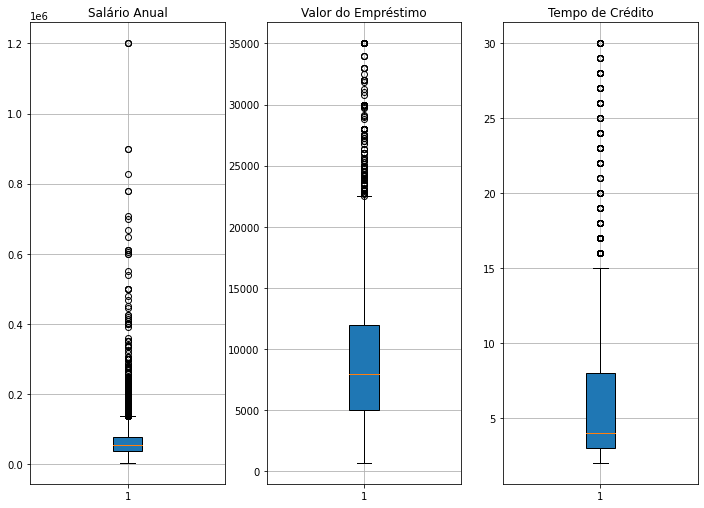

In [284]:
fig, ax = plt.subplots(1, 3, figsize=(10,7))
fig.tight_layout()

ax[0].boxplot(base['salario_anual'], patch_artist=True)
ax[0].set_title('Salário Anual')
ax[0].grid(True)

ax[1].boxplot(base['valor_emprestimo'], patch_artist=True)
ax[1].set_title('Valor do Empréstimo')
ax[1].grid(True)

ax[2].boxplot(base['tempo_credito'], patch_artist=True)
ax[2].set_title('Tempo de Crédito')
ax[2].grid(True)

Para utilizar o método de Tukey, devemos determinar o limite superior e o limite inferior com base nos Quartis. 

O **limite inferior** é definido como:

$L_{inf} = Q1 - (1.5 * IQR) $

E o **limite superior**, definimos como:

$L_{sup} = Q3 + (1.5 * IQR) $

In [285]:
Q3 = base['salario_anual'].quantile(0.75)
Q1 = base['salario_anual'].quantile(0.25)

IQR = Q3 - Q1

lim_inf = Q1 - (IQR * 1.5)
lim_sup = Q3 + (IQR * 1.5)

base = base[(base['salario_anual'] > lim_inf) & (base['salario_anual'] < lim_sup)]
base = base.reset_index(drop = True)

In [286]:
Q3 = base['valor_emprestimo'].quantile(0.75)
Q1 = base['valor_emprestimo'].quantile(0.25)

IQR = Q3 - Q1

lim_inf = Q1 - (IQR * 1.5)
lim_sup = Q3 + (IQR * 1.5)

base = base[(base['valor_emprestimo'] > lim_inf) & (base['valor_emprestimo'] < lim_sup)]
base = base.reset_index(drop = True)

In [287]:
Q3 = base['tempo_credito'].quantile(0.75)
Q1 = base['tempo_credito'].quantile(0.25)

IQR = Q3 - Q1

lim_inf = Q1 - (IQR * 1.5)
lim_sup = Q3 + (IQR * 1.5)

base = base[(base['tempo_credito'] > lim_inf) & (base['tempo_credito'] < lim_sup)]
base = base.reset_index(drop = True)

Os algoritmos acima implementados, nos fornecem um boxplot muito mais limpo e organizado, conforme podemos verificar na figura abaixo:

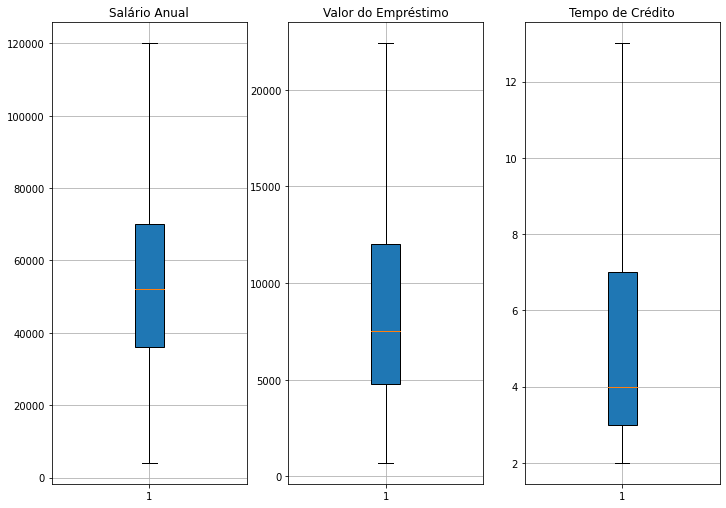

In [290]:
fig, ax = plt.subplots(1, 3, figsize=(10,7))
fig.tight_layout()

ax[0].boxplot(base['salario_anual'], patch_artist=True)
ax[0].set_title('Salário Anual')
ax[0].grid(True)

ax[1].boxplot(base['valor_emprestimo'], patch_artist=True)
ax[1].set_title('Valor do Empréstimo')
ax[1].grid(True)

ax[2].boxplot(base['tempo_credito'], patch_artist=True)
ax[2].set_title('Tempo de Crédito')
ax[2].grid(True)

### **3.3 Analisando a Correlação das Variáveis:**

A correlação é uma técnica estatística que visa estimar a relação  que possa existir entre duas variáveis. Normalmente, utiliza-se uma matriz de Correlação que mostrará o coeficiente de correlação entre as variáveis.

As features podem apresentar dois tipos de relações:
- **Correlação Positiva:** Quando os dados são proporcionais, ou seja, se "movem" na mesma direção;
- **Correlação Negativa:** Quando se movem em direções opostas, sendo inversamente proporcionais.

In [201]:
base.corr()

,idade,salario_anual,situacao_moradia,motivo_emprestimo,pontuacao_emprestimo,valor_emprestimo,inadimplencia,historico_inadimplencia,tempo_credito
idade,1.000000,0.069731,0.025738,0.094224,0.015945,0.028060,-0.019321,0.007536,0.818944
salario_anual,0.069731,1.000000,0.160389,0.061548,-0.073152,0.329299,-0.285219,-0.042669,0.049206
situacao_moradia,0.025738,0.160389,1.000000,0.016051,-0.110127,0.036510,-0.211394,-0.047606,0.025969
motivo_emprestimo,0.094224,0.061548,0.016051,1.000000,0.011939,0.029347,0.065619,-0.006114,0.071686
pontuacao_emprestimo,0.015945,-0.073152,-0.110127,0.011939,1.000000,0.085575,0.357342,0.529221,0.017186
valor_emprestimo,0.028060,0.329299,0.036510,0.029347,0.085575,1.000000,0.077933,0.009508,0.019757
inadimplencia,-0.019321,-0.285219,-0.211394,0.065619,0.357342,0.077933,1.000000,0.164895,-0.009107
historico_inadimplencia,0.007536,-0.042669,-0.047606,-0.006114,0.529221,0.009508,0.164895,1.000000,0.006185
tempo_credito,0.818944,0.049206,0.025969,0.071686,0.017186,0.019757,-0.009107,0.006185,1.000000


Para uma melhor visualização, também podem observar a correlação através de mapa de calor (*Heatmap*):

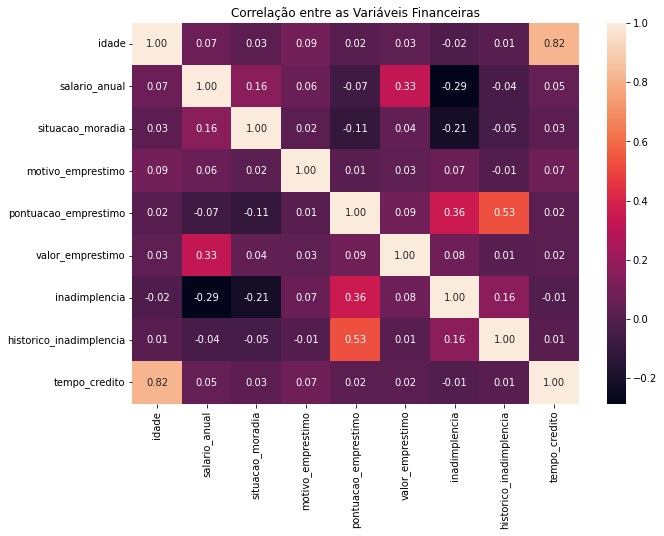

In [202]:
plt.figure(figsize=(10, 7))
sns.heatmap(base.corr(),
            annot = True,
            fmt = '.2f')
plt.title('Correlação entre as Variáveis Financeiras')
plt.show()

---
## **4. Modelos de Machine Learning:**
Nesse capítulo abordaremos o desenvolvimento de modelos de Machine Learning para previsão da inadimplência financeira de clientes. Foram desenvolvidos três modelos distintos: ***(1) Linear SVC, (2) SVC e (3) Árvore de Decisão***. Ao final de suas implementações, será analisado o desempenho de cada um e discutido qual será utilizado e o porquê da decisão.


### **4.1 Definindo nossas Features:**
Antes de iniciar o desenvolvimento, é necessário definir as nossas *features*. Nessa parte, definiremos as variáveis de treino e teste através da classe `train_test_split` da biblioteca `sklearn`.





In [246]:
x = base[['idade', 'salario_anual', 'situacao_moradia', 'anos_trabalhados', 'motivo_emprestimo', 'pontuacao_emprestimo', 'valor_emprestimo',
          'taxa_juros', 'comprometimento_renda', 'historico_inadimplencia', 'tempo_credito']]
y = base['inadimplencia']

In [247]:
SEED = 44
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = SEED)

### **4.2 Linear SVC:**
O modelo de Machine Learning Linear SVC (em inglês, *Support Vector Machine*), é um classificador discriminativo formalmente definido por um hiperplano de separação (ARAUJO, 2020). Em outras palavras, o que o algoritmo faz é encontrar uma linha (hiperplano) que separe as classes.

In [248]:
modelo_linearsvc = LinearSVC(random_state = SEED)
modelo_linearsvc.fit(x_treino, y_treino)

previsoes_linearsvc = modelo_linearsvc.predict(x_teste)

taxa_acertos_linearsvc = accuracy_score(y_teste, previsoes_linearsvc)
taxa_acertos_linearsvc = taxa_acertos_linearsvc * 100
print(f'A Taxa de acerto foi de {taxa_acertos_linearsvc.round(2)} %')

A Taxa de acerto foi de 80.32 %


### **4.3 SVC:**
Da mesma forma que o Linear SVC, o SVC também é um algoritmo classificador. A principal diferença entre os dois está no tipo dos classificadores. Enquanto que o Linear SVC permite somente classificadores lineares, o SVC permite uma ampla variedade de classificadores não-lineares. Contudo, esse algoritmo é muito sucetível a variações na escala. Dessa forma, necessitamos redimensionar as escalas antes de sua implementação. Para tal, utilizamos a classe `StandardScaler` da biblioteca `sklearn`.

In [250]:
SEED = 44
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = SEED)

In [251]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [252]:
modelo_svc = SVC(gamma='auto')
modelo_svc.fit(treino_x, treino_y)
previsoes_svc = modelo_svc.predict(teste_x)

In [253]:
taxa_acertos_svc = accuracy_score(teste_y, previsoes_svc) * 100
print(f'A Taxa de acerto foi de {taxa_acertos_svc.round(2)} %')

A Taxa de acerto foi de 88.47 %


### **4.4 Árvore de Decisão:**

O algoritmo de árvore de decisão, ou *Decision Trees*, são algoritmos amplamente utilizados. Neste algoritmo vários pontos de decisão são criados e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro (CAMPOS, 2017). Sua vantagem está na capacidade do desenvolver entender o porquê de cada decisão, diferentemente de outros modelos, onde não é possível. 

In [254]:
SEED = 44
np.random.seed(SEED)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = SEED)

In [255]:
modelo_tree = DecisionTreeClassifier(random_state = SEED)
modelo_tree.fit(x_treino, y_treino)
previsoes_tree = modelo_tree.predict(x_teste)

In [256]:
taxa_acertos_tree = accuracy_score(teste_y, previsoes_tree) * 100
print(f'A Taxa de acerto foi de {taxa_acertos_tree.round(2)} %')

A Taxa de acerto foi de 86.59 %


### **4.5 Baseline:**

Finalizamos o desenvolvimento dos três modelos de Machine Learning e medidmos sua acurácia. E agora, **como sabemos se o modelo é bom ou não?** **80% é bom? O que me baseio para isso?**

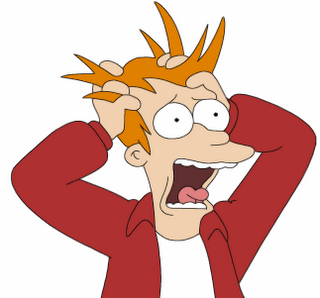

**Muita calma nessa hora!** Uma métrica muito utilizada para avaliar a efetividade de um modelo de Machine Learning são os chamados *Baselines*. Um baseline nada mais é do que um valor, uma predição, que nosso algoritmo deve superar (AKÇAY, 2022).

Nesse projeto, utilizaremos como *baseline* um classificador do tipo **Dummy**, que nada mais que é um classificador que utiliza regras básicas para predição (YUKIO, 2020).

In [257]:
dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(x_treino, y_treino)

DummyClassifier(strategy='stratified')

In [258]:
previsoes_dummy = dummy_stratified.predict(x_teste)

In [259]:
taxa_acertos_dummy = accuracy_score(y_teste, previsoes_dummy)
taxa_acertos_dummy = taxa_acertos_dummy*100
print(f'A Taxa de acerto foi de {taxa_acertos_dummy.round(2)} %')

A Taxa de acerto foi de 65.48 %


### **4.6 Qual o melhor modelo?**

Para responder essa pergunta, necessitamos definir qual será a nossa métrica de avaliação. Inicialmente, vamos avaliar o desempenho de cada modelo em relação ao *baseline*:

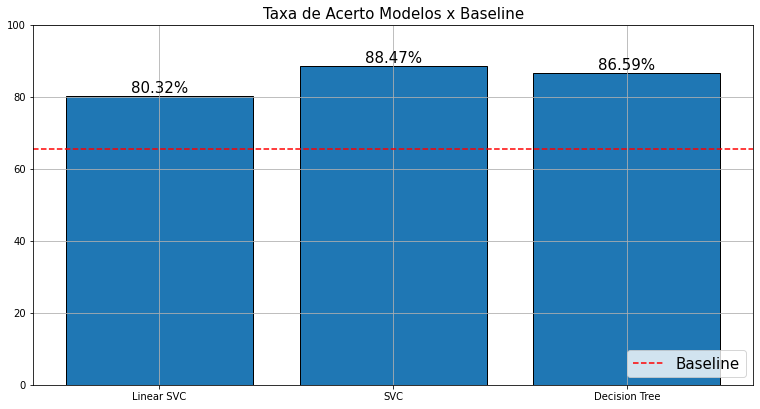

In [275]:
fig = plt.figure(figsize = (10, 5))
eixo = fig.add_axes([0, 0, 1, 1])

dados_acuracia = [taxa_acertos_linearsvc, taxa_acertos_svc, taxa_acertos_tree]
indice = range(len(dados_acuracia))
eixo.bar(indice, dados_acuracia,
         edgecolor = 'k')

eixo.set_title('Taxa de Acerto Modelos x Baseline', fontsize = 15)
eixo.grid(True)
eixo.set_xticks(indice)
eixo.set_xticklabels(['Linear SVC', 'SVC', 'Decision Tree'])
eixo.set_ylim(0, 100)

eixo.axhline(taxa_acertos_dummy, color = 'r', ls = '--')
eixo.legend(['Baseline'], loc = 'lower right', fontsize = 15)

for bar in eixo.patches:
    eixo.annotate(format(bar.get_height(), '.2f') + "%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

Analisando a figura acima, concluímos que ambos os modelos apresentam a acurácia maior que o baseline, o que demonstra efetividade em todos eles. Logo, para definir qual será utilizado dentre eles, utilizei o critério daquele com maior **Taxa de Acertos**. Dessa forma, optei pelo modelo **SVC, com uma taxa de acertos de aproximadamente 89%.**



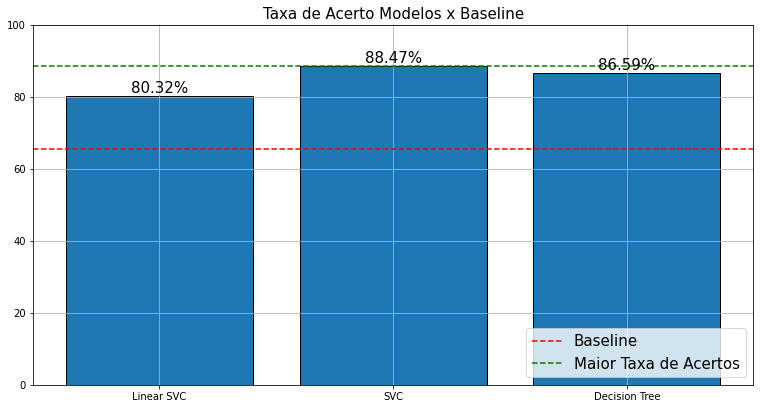

In [276]:
fig = plt.figure(figsize = (10, 5))
eixo = fig.add_axes([0, 0, 1, 1])

dados_acuracia = [taxa_acertos_linearsvc, taxa_acertos_svc, taxa_acertos_tree]
indice = range(len(dados_acuracia))
eixo.bar(indice, dados_acuracia,
         edgecolor = 'k')

eixo.set_title('Taxa de Acerto Modelos x Baseline', fontsize = 15)
eixo.grid(True)
eixo.set_xticks(indice)
eixo.set_xticklabels(['Linear SVC', 'SVC', 'Decision Tree'])
eixo.set_ylim(0, 100)

eixo.axhline(taxa_acertos_dummy, color = 'r', ls = '--')
eixo.axhline(taxa_acertos_svc, color = 'g', ls = '--')

eixo.legend(['Baseline', 'Maior Taxa de Acertos'], loc = 'lower right', fontsize = 15)

for bar in eixo.patches:
    eixo.annotate(format(bar.get_height(), '.2f') + "%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    


---
## **5. Otimização de Hiperparâmetros:**